# HW3
## İrem Şahin


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme()
def safelog(x):
    return(np.log(x + 1e-100))

## Importing Data

In [2]:
# read data into memory
data_set = np.genfromtxt("hw03_data_set_images.csv", delimiter = ",")
labels = (np.genfromtxt("hw03_data_set_labels.csv", delimiter=",", dtype=str)).astype(str)


# get number of classes and number of samples
classes = np.unique(labels)
K = len(classes)
N = data_set.shape[0]

# turn the ABCDE into 01234 to use it easier
for i in range(N):
    result = np.argwhere(classes==labels[i])
    labels[i]=result[0][0]
labels= labels.astype(np.int)

# put first 25 points into training arrays and rest of the 14 points to test arrays
train=[]
test=[]
train_truth=[]
test_truth=[]
for i in range(K):
    for j in range(25):
        train.append(data_set[j+ 39*i])
        train_truth.append(labels[j+ 39*i])
    for k in range(14):
        test.append(data_set[25 +k+ 39*i])
        test_truth.append(labels[25 +k+ 39*i])
train=np.array(train)
test=np.array(test)
train_truth=np.array(train_truth)
test_truth=np.array(test_truth)

## Parameter estimation

In [3]:
class_priors = [np.mean(train_truth == (c)) for c in range(K)]
pcd = [np.mean(train[train_truth == (c)],axis=0) for c in range(K)]
pcd = np.reshape(pcd,(5,320))

## Plotting estimated images

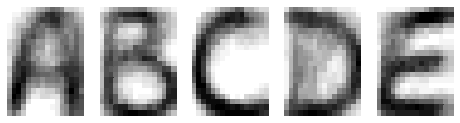

In [4]:
fig = plt.figure(figsize=(8,2))
for i in range(K):
    plt.subplot(1,5,i+1)
    sns.heatmap(pcd[i].reshape(16,20).T,cmap=plt.cm.binary, cbar=False,xticklabels=False,yticklabels=False)
plt.show()

## Define score function

In [5]:
def score(train,pcd):
    global K, class_priors
    score = []
    for i in range(train.shape[0]):
        score.append([np.sum(train[i] * safelog(pcd[c] ) + (1-train[i]) * safelog(1-pcd[c]))  + safelog(class_priors[c]) for c in range(K)])
    return np.array(score)

## Confusion for train data 

In [6]:
train_score =score(train,pcd)
train_predicted = np.argmax(train_score, axis = 1)+1
confusion_matrix = pd.crosstab(train_predicted, train_truth+1, rownames = ['train_pred'], colnames = ['train_truth'])
print(confusion_matrix)

train_truth   1   2   3   4   5
train_pred                     
1            25   0   0   0   0
2             0  24   1   0   1
3             0   0  24   0   0
4             0   1   0  25   0
5             0   0   0   0  24


## Confusion for test data

In [7]:
test_score = score(test,pcd)
test_predicted = np.argmax(test_score, axis = 1)+1
confusion_matrix = pd.crosstab(test_predicted, test_truth+1, rownames = ['test_pred'], colnames = ['test_truth'])
print(confusion_matrix)

test_truth  1   2  3   4   5
test_pred                   
1           7   0  0   0   0
2           0  11  3   2   4
3           0   0  7   0   0
4           7   3  3  12   0
5           0   0  1   0  10
